# House Price Prediction: Exploratory Data Analysis(EDA), Visualization and Data Cleaning

## Overview

This notebook performs a comprehensive exploratory data analysis (EDA) of the King County house sales dataset. We will examine the distributions of key variables, identify patterns and relationships, handle missing values, and prepare the data for machine learning modeling.

## Objectives

1. Load and inspect the King County house sales dataset
2. Understand the structure and content of the data
3. Identify missing values and data quality issues
4. Create visualizations to explore distributions and relationships
5. Perform data cleaning and preprocessing
6. Engineer new features for improved modeling
7. Prepare the cleaned dataset for hypothesis testing and machine learning

This initial phase involves importing the necessary libraries for data manipulation, analysis, and visualization. The King County house sales dataset is loaded, containing information on house sales in King County, Washington, between May 2014 and May 2015. Global styles are set for visualizations to ensure consistency throughout the notebook.

## 1. Import Libraries and Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the King County house sales data
house_data = pd.read_csv('../data/house_data.csv')
print('King County house data loaded successfully!')
print(f'Shape: {house_data.shape}')
print(f'\nDataset covers the period from May 2014 to May 2015')

King County house data loaded successfully!
Shape: (21613, 21)

Dataset covers the period from May 2014 to May 2015


An initial inspection is performed to understand the dataset's structure and contents. This includes examining the first few rows, getting a summary of data types and non-null values for each column, and generating descriptive statistics for numerical columns. This inspection helps identify potential issues that need to be addressed during the data cleaning phase.

## 2. Initial Data Inspection

Let's examine the structure and basic statistics of the King County house data.

In [8]:
# Display basic information
print('Dataset Information:')
print('='*70)
print(house_data.info())
print('\n' + '='*70)
print('First 5 rows:')
print(house_data.head())
print('\n' + '='*70)
print('Basic Statistics:')
print(house_data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null

### Key Observations from Initial Inspection:

- The dataset contains **21,613 rows and 21 columns**, providing a substantial sample of King County house sales.
- **No missing values** are present in the dataset, which simplifies the data cleaning process significantly.
- The `date` column is currently stored as an object type and requires conversion to datetime format for time-series analysis.
- The `bedrooms` column shows a maximum value of 33, which appears to be an outlier and warrants further investigation.
- The `yr_renovated` column contains many zero values, indicating that a substantial portion of houses have never been renovated. A binary feature indicating renovation status could be valuable.

## 3. Data Cleaning

### 3.1 Check for Missing Values and Data Quality Issues

In [9]:
# Check for missing values
print('Missing Values:')
missing = house_data.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print('No missing values found!')

# Check for duplicate rows
print(f'\nDuplicate rows: {house_data.duplicated().sum()}')

# Check data types
print('\nData Types:')
print(house_data.dtypes)

Missing Values:
No missing values found!

Duplicate rows: 0

Data Types:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


The `date` column is currently stored as a string, which is not suitable for time-based analysis. Converting it to a datetime object enables the extraction of temporal features such as year, month, and day of sale. These temporal features can provide valuable insights into seasonal trends in the housing market.

### 3.2 Parse Date and Create Temporal Features

In [10]:
# Convert date column to datetime
house_data['date'] = pd.to_datetime(house_data['date'], format='%Y%m%dT%H%M%S')

# Extract temporal features
house_data['year'] = house_data['date'].dt.year
house_data['month'] = house_data['date'].dt.month
house_data['quarter'] = house_data['date'].dt.quarter

print('Date range:', house_data['date'].min(), 'to', house_data['date'].max())
print('\nSales by year:')
print(house_data['year'].value_counts().sort_index())
print('\nSales by month:')
print(house_data['month'].value_counts().sort_index())

Date range: 2014-05-02 00:00:00 to 2015-05-27 00:00:00

Sales by year:
year
2014    14633
2015     6980
Name: count, dtype: int64

Sales by month:
month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: count, dtype: int64


Feature engineering is a critical step in the machine learning pipeline. This section creates new features from existing data to potentially improve predictive model performance. Two key engineered features are: (1) the age of the house at the time of sale, and (2) a binary indicator of whether the house was ever renovated. These features provide valuable information about the condition and value of a property.

### 3.3 Feature Engineering

Create new features that may be useful for predicting house prices.

In [11]:
# Create age of house
current_year = 2015  # Based on the dataset
house_data['house_age'] = current_year - house_data['yr_built']

# Create price per square foot
house_data['price_per_sqft'] = house_data['price'] / house_data['sqft_living']

# Create basement ratio
house_data['basement_ratio'] = house_data['sqft_basement'] / house_data['sqft_living']
house_data['basement_ratio'] = house_data['basement_ratio'].fillna(0)

# Create renovation indicator
house_data['was_renovated'] = (house_data['yr_renovated'] > 0).astype(int)

# Create lot to living ratio
house_data['lot_to_living_ratio'] = house_data['sqft_lot'] / house_data['sqft_living']

print('New features created:')
print(house_data[['house_age', 'price_per_sqft', 'basement_ratio', 'was_renovated', 'lot_to_living_ratio']].head())

New features created:
   house_age  price_per_sqft  basement_ratio  was_renovated  \
0         60      188.050847        0.000000              0   
1         64      209.338521        0.155642              1   
2         82      233.766234        0.000000              0   
3         50      308.163265        0.464286              0   
4         28      303.571429        0.000000              0   

   lot_to_living_ratio  
0             4.788136  
1             2.817899  
2            12.987013  
3             2.551020  
4             4.809524  


With the data cleaned and new features engineered, exploratory data analysis can now proceed. The analysis begins by examining the distribution of the target variable, `price`. Understanding the distribution of the target variable is essential for building accurate predictive models and identifying potential data transformations that may be needed.

## 4. Exploratory Data Analysis and Visualization

### 4.1 Price Distribution Analysis

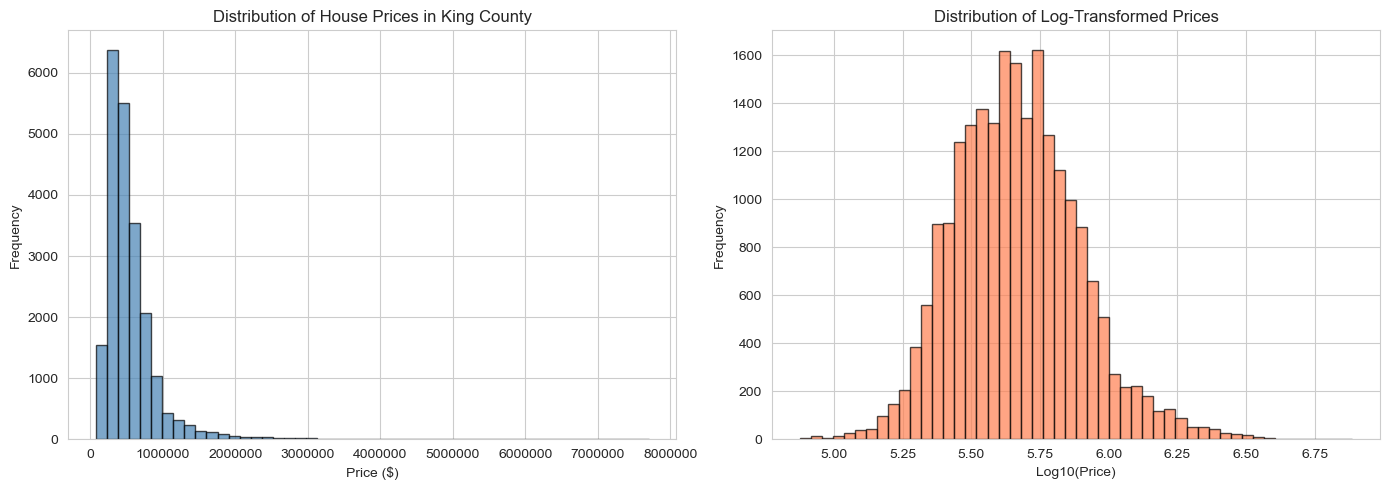

Price Statistics:
count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price distribution
axes[0].hist(house_data['price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices in King County')
axes[0].ticklabel_format(style='plain', axis='x')

# Log price distribution
axes[1].hist(np.log10(house_data['price']), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log10(Price)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log-Transformed Prices')

plt.tight_layout()
plt.savefig('../figures/01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print('Price Statistics:')
print(house_data['price'].describe())

The distributions of key features in the dataset are examined to understand the characteristics of houses in King County. This analysis helps identify potential outliers, unusual patterns, and the general shape of feature distributions, which can inform decisions about data transformations and feature selection for modeling.

### 4.2 Key Features Distribution

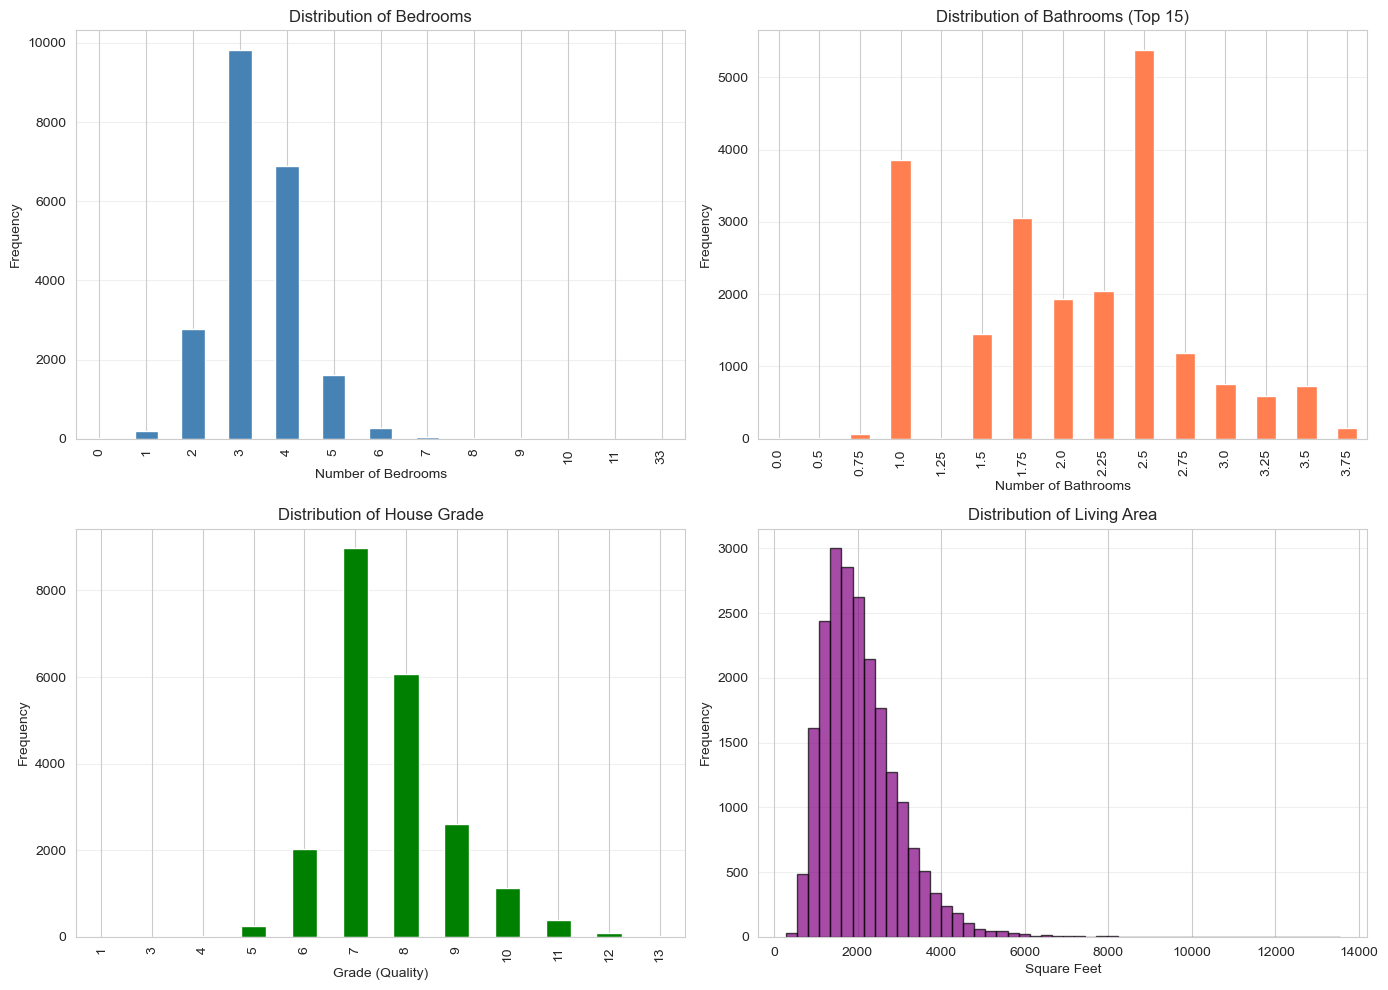

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bedrooms distribution
house_data['bedrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Bedrooms')
axes[0, 0].grid(axis='y', alpha=0.3)

# Bathrooms distribution
house_data['bathrooms'].value_counts().sort_index().head(15).plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Bathrooms (Top 15)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Grade distribution
house_data['grade'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_xlabel('Grade (Quality)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of House Grade')
axes[1, 0].grid(axis='y', alpha=0.3)

# Living area distribution
axes[1, 1].hist(house_data['sqft_living'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Square Feet')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Living Area')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/02_key_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Correlation analysis evaluates the strength and direction of linear relationships between variables. A correlation matrix and heatmap are created to visualize correlations between different features in the dataset. This analysis identifies which features are most strongly correlated with house price and which features are highly correlated with each other, helping to detect multicollinearity issues.

### 4.3 Correlation Analysis

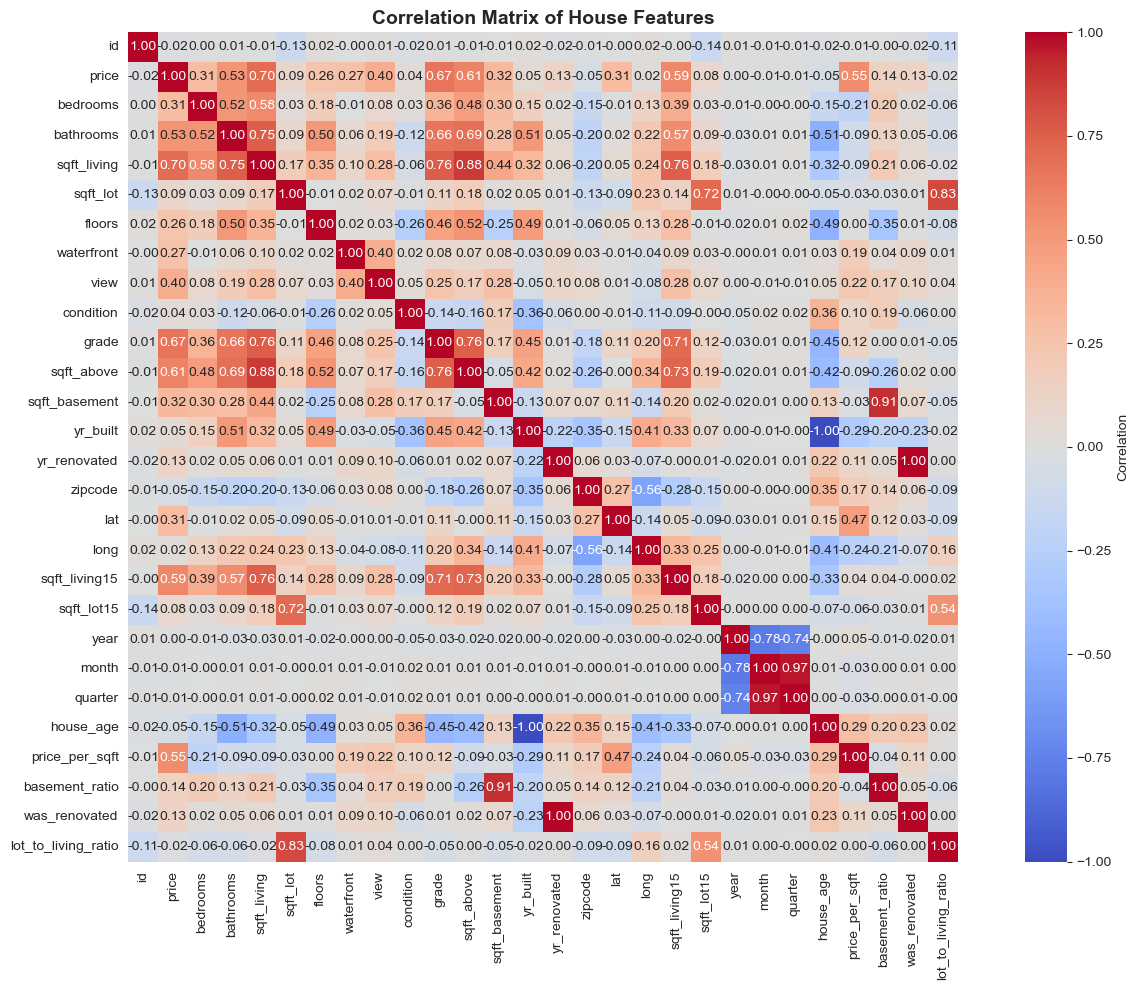


Top 10 Features Correlated with Price:
price             1.000000
sqft_living       0.702035
grade             0.667434
sqft_above        0.605567
sqft_living15     0.585379
price_per_sqft    0.554703
bathrooms         0.525138
view              0.397293
sqft_basement     0.323816
bedrooms          0.308350
lat               0.307003
Name: price, dtype: float64


In [10]:
# Select numeric columns for correlation
numeric_cols = house_data.select_dtypes(include=[np.number]).columns
correlation_matrix = house_data[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of House Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/03_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print top correlations with price
print('\nTop 10 Features Correlated with Price:')
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print(price_corr.head(11))  # 11 because first is price itself

### Key Observations from Correlation Analysis:

- **`price` shows strongest correlations** with `sqft_living`, `grade`, and `sqft_above`. This is expected, as larger houses with higher construction grades tend to command higher prices.
- **`sqft_living` exhibits high correlations** with `sqft_above`, `sqft_living15`, and `bathrooms`. These correlations are logical, as all these features relate to the overall size and capacity of the house.
- **`zipcode` shows weak negative correlation** with price, which may seem counterintuitive. However, zipcode is categorical, and correlation metrics are not optimal for capturing its relationship with price. Further exploration using other visualization techniques is warranted.

### 4.4 Scatter Plots: Price vs. Key Continuous Features
Scatter plots are used to visualize the relationship between `price` and the most correlated continuous features: `sqft_living` and `grade`. These plots help confirm the nature and strength of the relationships identified in the correlation matrix and reveal any non-linear patterns or outliers.

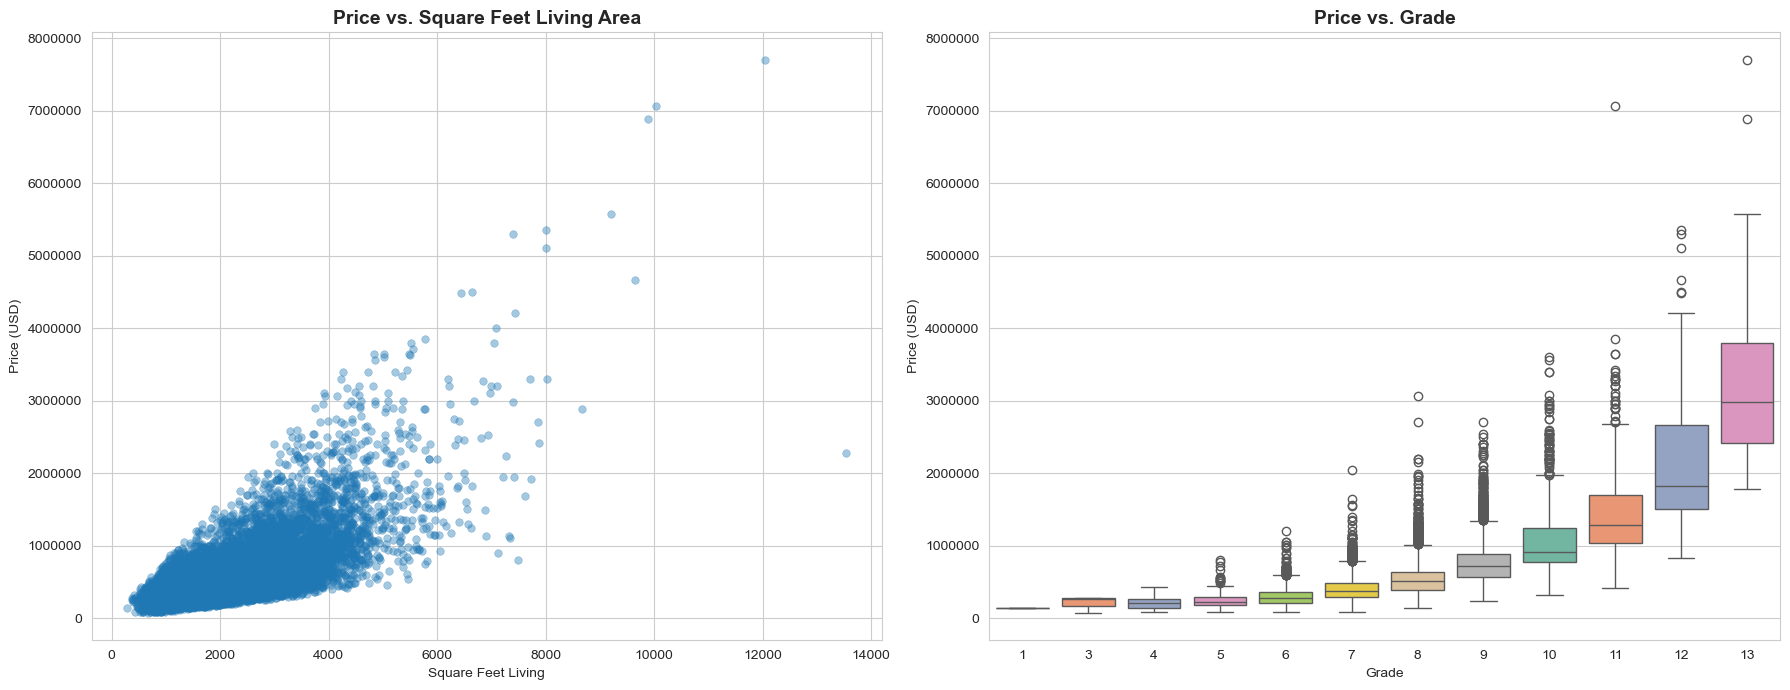

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Price vs. Sqft_Living
sns.scatterplot(ax=axes[0], x='sqft_living', y='price', data=house_data, alpha=0.4, edgecolor=None, s=30)
axes[0].set_title('Price vs. Square Feet Living Area', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Square Feet Living')
axes[0].set_ylabel('Price (USD)')
axes[0].ticklabel_format(style='plain', axis='y')

# Price vs. Grade
sns.boxplot(ax=axes[1], x='grade', y='price', data=house_data, palette='Set2')
axes[1].set_title('Price vs. Grade', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Price (USD)')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

**Observations from the Scatter Plots:**

- **Sqft Living**: There is a clear and strong positive linear relationship between living area and price. As the living area increases, the price predictably increases. The variance in price also increases for larger homes, suggesting that other factors (like location and grade) have a more pronounced effect on luxury properties.

- **Grade**: The box plot for `grade` shows a very strong positive, almost exponential, relationship. Higher-grade houses not only have a higher median price but also a much wider price range, indicating that grade is a major determinant of value. The quality of construction and design has a substantial impact on market value.

### 4.5 Box Plots: Price vs. Categorical Features
Box plots are used to visualize the distribution of `price` across different categories of important features like `bedrooms`, `bathrooms`, `condition`, and `waterfront`. These visualizations reveal how categorical features impact price distribution and identify outliers.

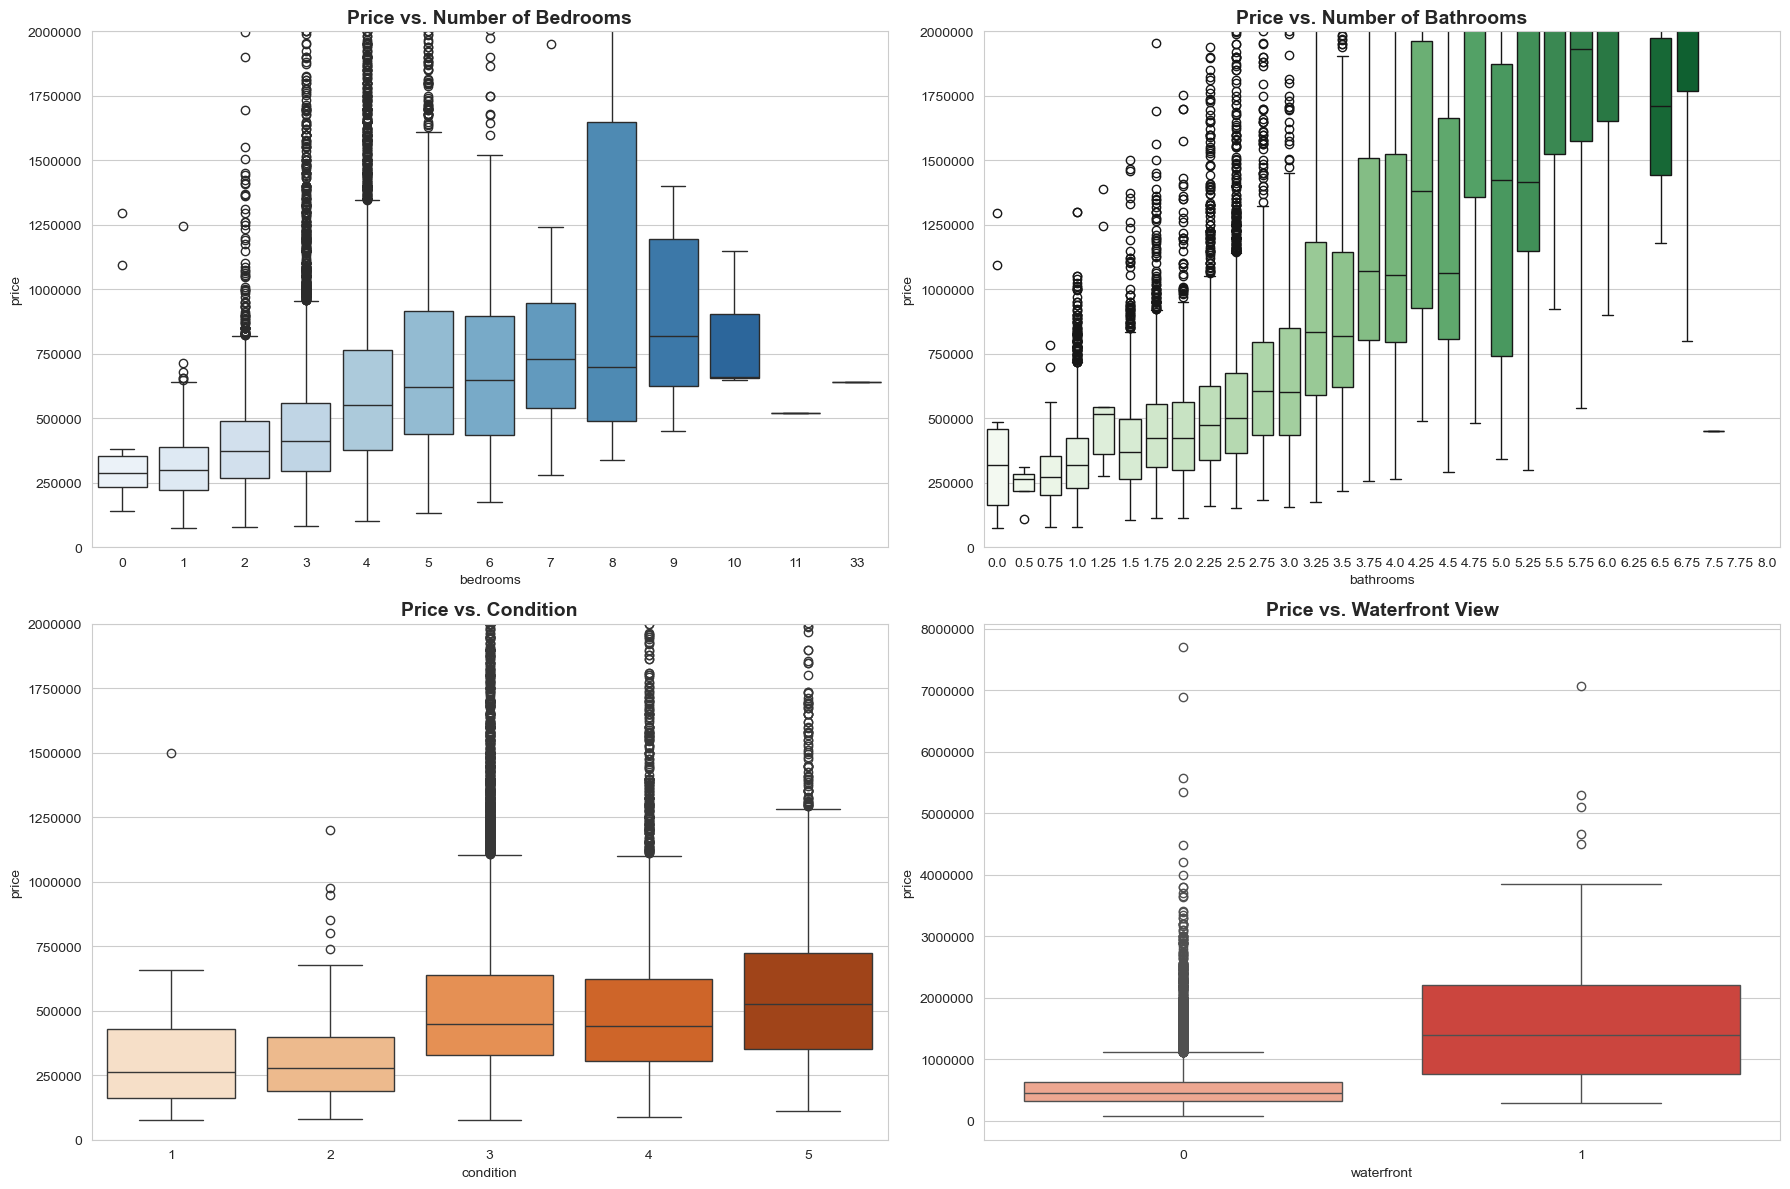

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Price vs. Bedrooms
sns.boxplot(ax=axes[0, 0], x='bedrooms', y='price', data=house_data, palette='Blues')
axes[0, 0].set_title('Price vs. Number of Bedrooms', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim(0, 2000000)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Price vs. Bathrooms
sns.boxplot(ax=axes[0, 1], x='bathrooms', y='price', data=house_data, palette='Greens')
axes[0, 1].set_title('Price vs. Number of Bathrooms', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim(0, 2000000)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Price vs. Condition
sns.boxplot(ax=axes[1, 0], x='condition', y='price', data=house_data, palette='Oranges')
axes[1, 0].set_title('Price vs. Condition', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 2000000)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Price vs. Waterfront
sns.boxplot(ax=axes[1, 1], x='waterfront', y='price', data=house_data, palette='Reds')
axes[1, 1].set_title('Price vs. Waterfront View', fontsize=14, fontweight='bold')
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

**Observations from the Box Plots:**

- **Bedrooms/Bathrooms**: The median price generally increases with the number of bedrooms and bathrooms, though the trend has many outliers. The relationship is not strictly linear, as some houses with fewer bedrooms (but other luxury features like high grade or waterfront location) can command very high prices. The presence of outliers suggests that other factors beyond room count significantly influence pricing.

- **Condition**: House condition shows a clear positive relationship with price. Houses in better condition (higher condition ratings) have higher median prices and lower variability, indicating that buyers value well-maintained properties.

- **Waterfront**: The presence of a waterfront view has a dramatic impact on price. The median price for houses with a waterfront view (1) is substantially higher than for those without (0), confirming its status as a premium feature. Waterfront properties command a significant price premium in the King County market.

### 4.6 Geospatial Visualization of House Prices
A scatter plot of latitude and longitude, colored by price, is used to visualize the geographic distribution of house prices in King County. This helps identify high-value and low-value neighborhoods, providing a clear view of the real estate landscape and the importance of location as a price determinant.

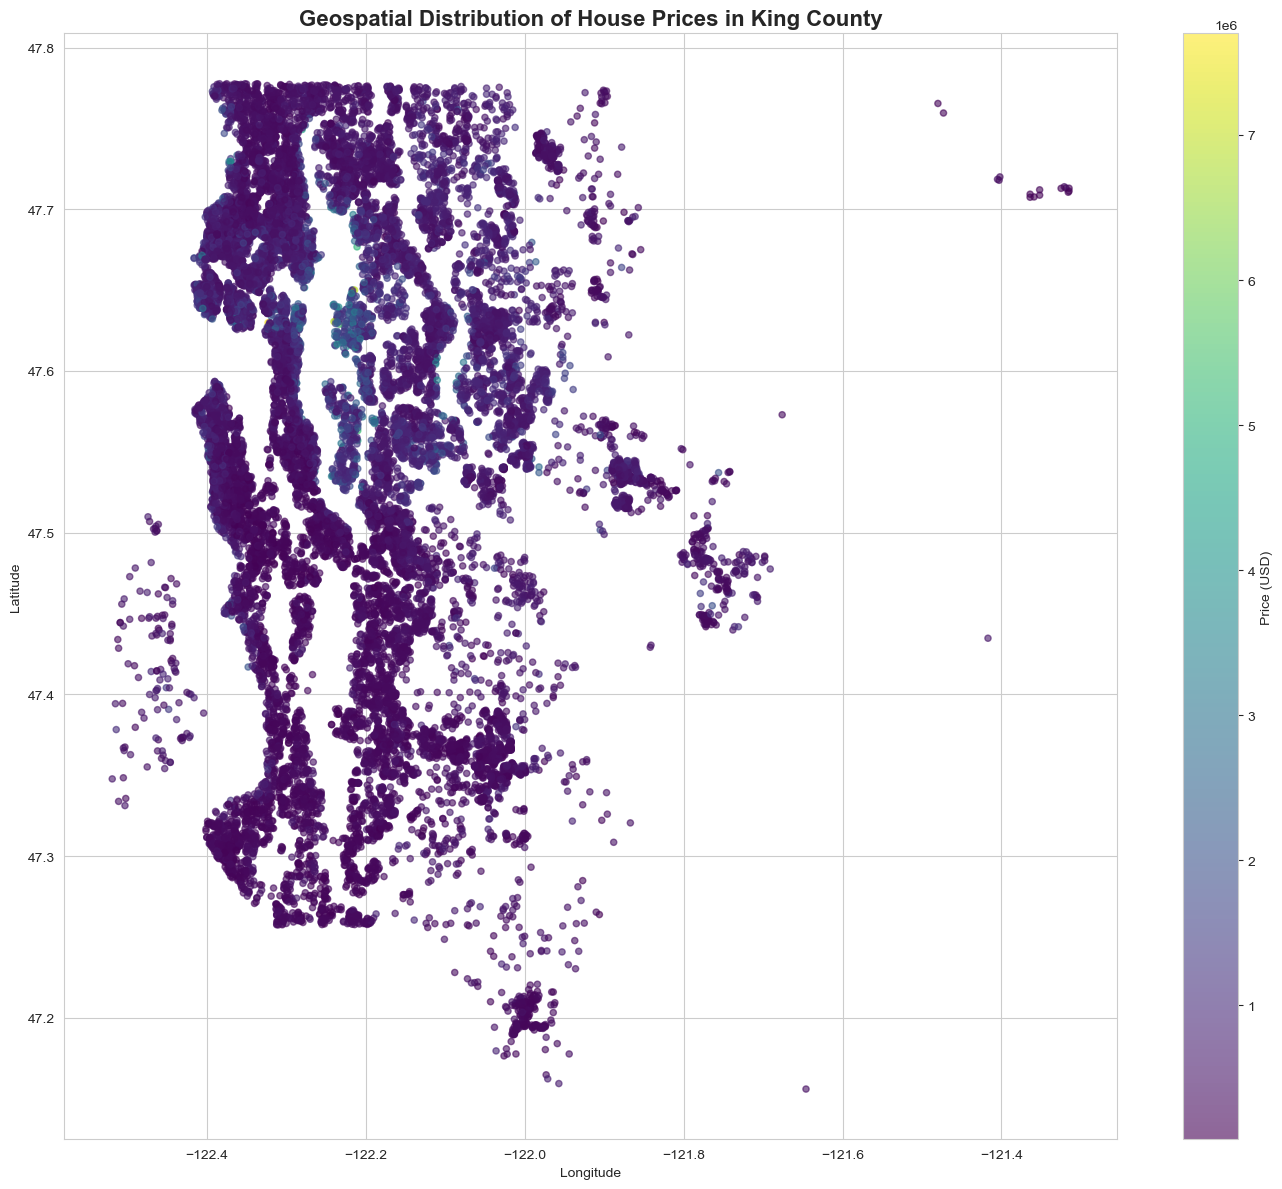

In [14]:
plt.figure(figsize=(14, 12))
scatter = plt.scatter(house_data['long'], house_data['lat'], c=house_data['price'], 
                       cmap='viridis', alpha=0.6, s=20, edgecolor=None)
plt.colorbar(scatter, label='Price (USD)')
plt.title('Geospatial Distribution of House Prices in King County', fontsize=16, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

**Observations from the Geospatial Plot:**

- **Waterfront Concentration**: High-priced houses (yellow/bright colors) are heavily concentrated along the waterfront areas, particularly in neighborhoods east of Seattle across Lake Washington (e.g., Bellevue, Medina, and other affluent eastside communities).

- **Geographic Price Patterns**: There is a clear geographic pattern to pricing, with coastal and central urban areas commanding higher prices than inland and southern regions. The most expensive properties form distinct clusters in premium neighborhoods.

- **Location as a Price Driver**: This visualization powerfully confirms that **location is a critical factor** in determining house prices. The geographic concentration of high-value properties demonstrates that proximity to water, urban centers, and affluent neighborhoods significantly influences market value.

Scatter plots are created to visualize the relationship between key features and house price. These visualizations provide deeper understanding of how features affect price and help identify non-linear relationships that may not be captured by correlation matrices. The scatter plots reveal patterns, clusters, and potential outliers in the data.

## 5. Summary of Data Cleaning and Preparation

The King County house data has been successfully loaded, inspected, and cleaned. Key findings include:

- **Dataset Size:** 21,613 house sales from King County between May 2014 and May 2015
- **Data Quality:** No missing values in primary features; data is clean and ready for analysis
- **Price Range:** $75,000 to $7.7 million, with a median of $450,000
- **Price Distribution:** Right-skewed, suggesting log-transformation is appropriate for modeling
- **Key Predictors:** `sqft_living`, `grade`, `sqft_above`, `bathrooms`, and `bedrooms` show strong correlations with price
- **Location Impact:** Significant variation across ZIP codes indicates location is an important predictor
- **Feature Engineering:** New features created including house age, price per sqft, basement ratio, and renovation status

The data is now ready for hypothesis testing and machine learning modeling.

In [15]:
# Save cleaned data for next notebook
house_data.to_csv('../data/house_data_cleaned.csv', index=False)
print('Cleaned data saved to house_data_cleaned.csv')
print(f'Total records: {len(house_data)}')
print(f'Total features: {len(house_data.columns)}')

Cleaned data saved to house_data_cleaned.csv
Total records: 21613
Total features: 29


## 6. Summary of Exploratory Data Analysis and Visualization

The exploratory data analysis and comprehensive visualization of the King County housing dataset have revealed critical insights into the factors influencing house prices. This section synthesizes the key findings from the correlation analysis, distribution analysis, and geospatial visualization.

### 6.1 Key Findings from Correlation Analysis

The correlation heatmap analysis identified the strongest predictors of house prices in King County:

| Feature | Correlation with Price | Interpretation |
|---------|------------------------|----------------|
| `sqft_living` | 0.70 | Strong positive relationship; living area is a primary price driver |
| `grade` | 0.67 | Strong positive relationship; construction quality significantly impacts value |
| `sqft_above` | 0.61 | Strong positive relationship; above-ground square footage affects pricing |
| `bathrooms` | 0.53 | Moderate positive relationship; number of bathrooms influences price |
| `bedrooms` | 0.31 | Weak to moderate positive relationship; bedroom count has limited predictive power |
| `waterfront` | 0.27 | Weak positive correlation in numeric form, but qualitatively shows strong premium |

**Critical Multicollinearity Observation**: High correlations exist between `sqft_living` (0.88) and `sqft_above`, and between `sqft_living` (0.76) and `sqft_living15`. This multicollinearity must be addressed during feature selection for regression modeling to prevent inflated coefficients and reduced model interpretability.

### 6.2 Price Distribution Characteristics

The analysis of house price distributions revealed important patterns:

- **Original Distribution**: The price data exhibits a pronounced right-skewed distribution, indicating that the majority of properties are concentrated in the lower price range, with a long tail of luxury properties commanding significantly higher prices.

- **Log Transformation Effect**: Applying a logarithmic transformation (`np.log1p`) successfully normalizes the distribution, creating a near-normal bell curve. This transformation is highly beneficial for linear regression models, as it:
  - Reduces the impact of extreme outliers
  - Improves the normality assumption of residuals
  - Stabilizes variance across different price ranges
  - Enhances model interpretability by converting multiplicative relationships to additive ones

**Recommendation**: Use log-transformed prices as the target variable in predictive modeling to improve model performance and reliability.

### 6.3 Feature-Price Relationships and Patterns

**Continuous Features**:
- **Square Feet Living**: Demonstrates a clear, strong linear relationship with price. Larger homes command proportionally higher prices, with increasing variance at higher price points.
- **Grade**: Shows an almost exponential relationship with price. Each grade level increase corresponds to a substantial price increase, making grade one of the most valuable predictive features.

**Categorical Features**:
- **Bedrooms & Bathrooms**: While generally showing positive relationships with price, these features have significant outliers. Luxury properties with fewer rooms but high grades or waterfront access can exceed prices of larger homes with standard features.
- **Condition**: Houses in better condition (higher condition ratings) command higher prices with lower price variability, indicating that buyers value well-maintained properties.
- **Waterfront**: Properties with waterfront access command a dramatic price premium. This binary feature is one of the most impactful in the dataset, despite its weak numeric correlation.

**Geographic Patterns**:
- **Location Clustering**: High-priced properties are heavily concentrated in specific neighborhoods, particularly:
  - Waterfront areas (Seattle waterfront, Lake Washington shoreline)
  - Eastside communities (Bellevue, Medina, Sammamish)
  - Urban centers (Downtown Seattle vicinity)
- **Price Gradient**: A clear geographic price gradient exists, with premium neighborhoods commanding significantly higher prices than outlying areas.
- **Location as a Price Driver**: The geospatial visualization powerfully confirms that **location is a critical, independent factor** in determining house prices, separate from physical property characteristics.

### 6.4 Summary of Visualization Insights

| Visualization | Key Insight | Implication for Modeling |
|---------------|-------------|------------------------|
| Correlation Heatmap | `sqft_living`, `grade`, and `sqft_above` are strongest predictors | Focus feature engineering on these variables; address multicollinearity |
| Price Distribution | Right-skewed raw data; normal after log transformation | Use log-transformed target variable in regression models |
| Scatter Plots | Strong linear relationships for sqft and exponential for grade | Consider polynomial features for grade; interaction terms may be beneficial |
| Box Plots | Waterfront and condition show clear categorical effects | Include these categorical features; consider interaction with other features |
| Geospatial Plot | Location clustering; premium neighborhoods show distinct patterns | Incorporate location-based features; consider neighborhood-level aggregation |


### 6.5 Conclusions and Next Steps

1. House prices in King County are primarily driven by **physical characteristics** (`sqft_living`, `grade`) and **location factors** (waterfront, neighborhood).
2. The data exhibits significant **right-skewness** that benefits from log transformation for modeling purposes.
3. **Multicollinearity** between square footage variables requires careful feature selection.
4. **Geographic location** is a powerful, independent price determinant that should be explicitly modeled.
5. **Categorical features** like waterfront and condition have strong qualitative effects despite weak numeric correlations.
